# Understanding the different observation geometries

In this notebook we provide some examples showing how NemesisPy can be used to interact with the Measurement reference class, which defines the observation geometry and the measured spectrum. The information in this class is typically read from the *.spx* file. In this notebook, we are going to show different examples, corresponding to different observation geometries, to show how NemesisPy can be used to read the *.spx* file, understand the different fields, modify them if required, and write a new *.spx* file.

In [1]:
from NemesisPy import *

## Observation geometry

Remote sensing of planetary atmospheres can be mainly performed using three kinds of observations: nadir-viewing, limb-viewing and solar or stelar occultations. In addition, recent measurements of planetary atmospheres also include upward-looking measurements by instruments on the surface. NEMESIS can model the electromagnetic spectrum in any of these types of observations, but the fields of the Measurement class must be filled accordingly to set up the correct geometry. In this section, we provide examples of *.spx* files for these different kinds of observations.

<img src="observation_sketch.png" alt="Drawing" style="width: 600px;"/>

### Nadir-viewing observations

Nadir-viewing observations are those in which the instruments observes straight down to the planet. Depending on the observation and the field-of-view (FOV) of the instrument, the spectra may represent just a single point of the planet, while the FOV of other measurements might encompass a large fraction or even the whole planet. Here, we provide examples for some of these cases. 

#### Single point measurement

In these observations, the instrument points straight down and the field-of-view is narrow enough that in practice the measurement represents a single location of the planet. The geometry of the measurement is therefore solely defined by the location on the planet (i.e., latitude and longitude), and the obsering angles (i.e., solar zenith angle, emission angle and azimuth angle). Here, we show an example of a *.spx* file for this kind of observations.  

Spectral resolution of the measurement is account for in the k-tables
Field-of-view centered at ::  Latitude 13.4538 - Longitude 5.45011
There are  1 geometries in the measurement vector

GEOMETRY 1
Minimum wavelength/wavenumber ::  0.476  - Maximum wavelength/wavenumber ::  0.933
Nadir-viewing geometry. Latitude ::  13.4538  - Longitude ::  0.0  - Emission angle ::  18.1584  - Solar Zenith Angle ::  17.4078  - Azimuth angle ::  157.432


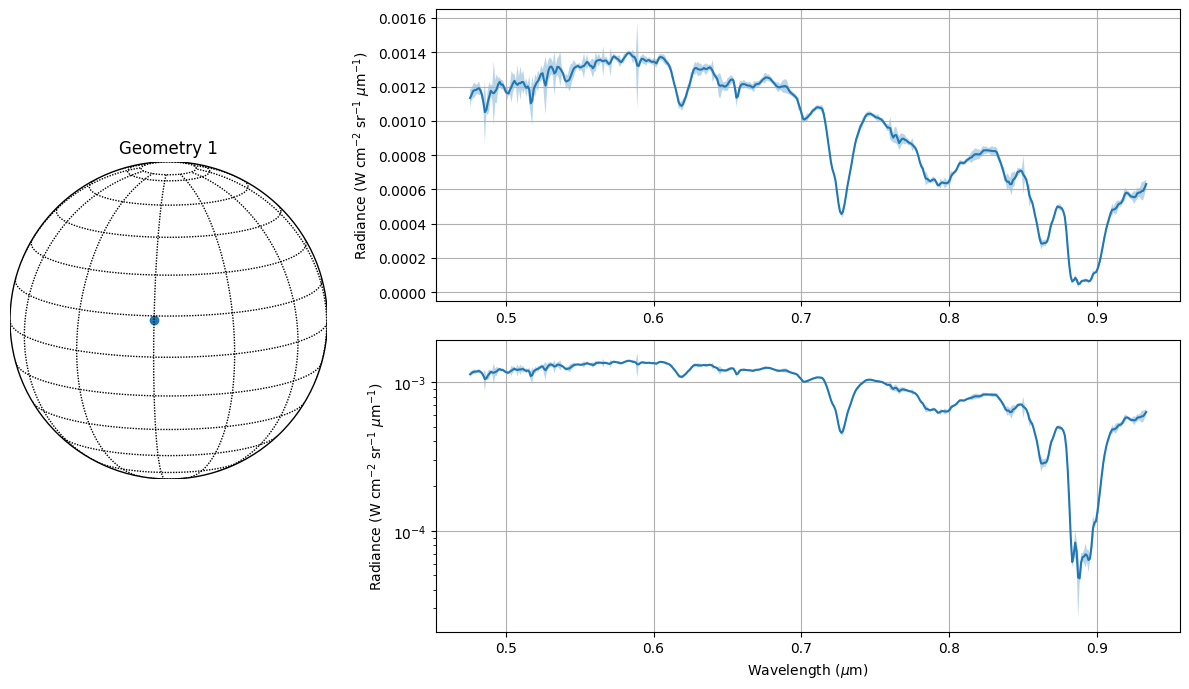

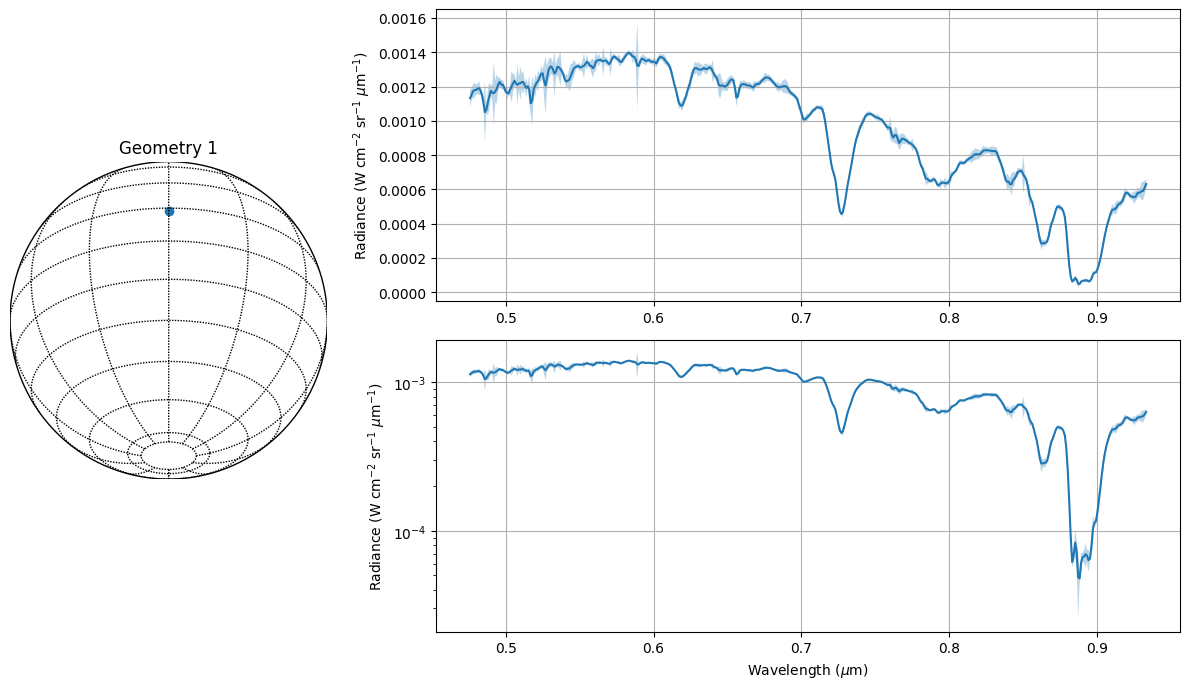

In [2]:
#Initialising the Measurement class
Measurement = Measurement_0(runname='jupiter_nadir')

#Reading the .spx file with the observations
Measurement.read_spx()

#Showing a summary of the observations
Measurement.summary_info()

#Making a summary plot of the observation
Measurement.plot_nadir()

#Making a summary plot of the observation defining the sub-observer location on planet
Measurement.plot_nadir(subobs_lat=-30.,subobs_lon=0.)

#### Disc averaging

In these observations, the instrument points straight down, but the field-of-view is so wide that it encompasses a large fraction or even the whole planet. The observed spectrum is then an average of the spectra at different locations and with different observing angles, which can be weighted to properly represent the field-of-view of the instrument. Therefore, in these measurements we can have one overall geometry (*NGEOM* = 1), but that geometry includes several averaging points (*NAV* > 1). Here, we show one example of this kind of measurements. 

Spectral resolution of the measurement is account for in the k-tables
Field-of-view centered at ::  Latitude 0.0 - Longitude 0.0
There are  1 geometries in the measurement vector

GEOMETRY 1
Minimum wavelength/wavenumber ::  1.1425  - Maximum wavelength/wavenumber ::  4.5
7  averaging points
Averaging point 1  - Weighting factor  0.069098
Nadir-viewing geometry. Latitude ::  0.0  - Longitude ::  40.9349  - Emission angle ::  63.4349  - Solar Zenith Angle ::  139.0651  - Azimuth angle ::  0.0
Averaging point 2  - Weighting factor  0.138197
Nadir-viewing geometry. Latitude ::  31.7175  - Longitude ::  35.7825  - Emission angle ::  63.4349  - Solar Zenith Angle ::  133.6367  - Azimuth angle ::  18.1075
Averaging point 3  - Weighting factor  0.138197
Nadir-viewing geometry. Latitude ::  58.2825  - Longitude ::  9.2175  - Emission angle ::  63.4349  - Solar Zenith Angle ::  121.2613  - Azimuth angle ::  25.1995
Averaging point 4  - Weighting factor  0.138197
Nadir-viewing geometry. Latitude

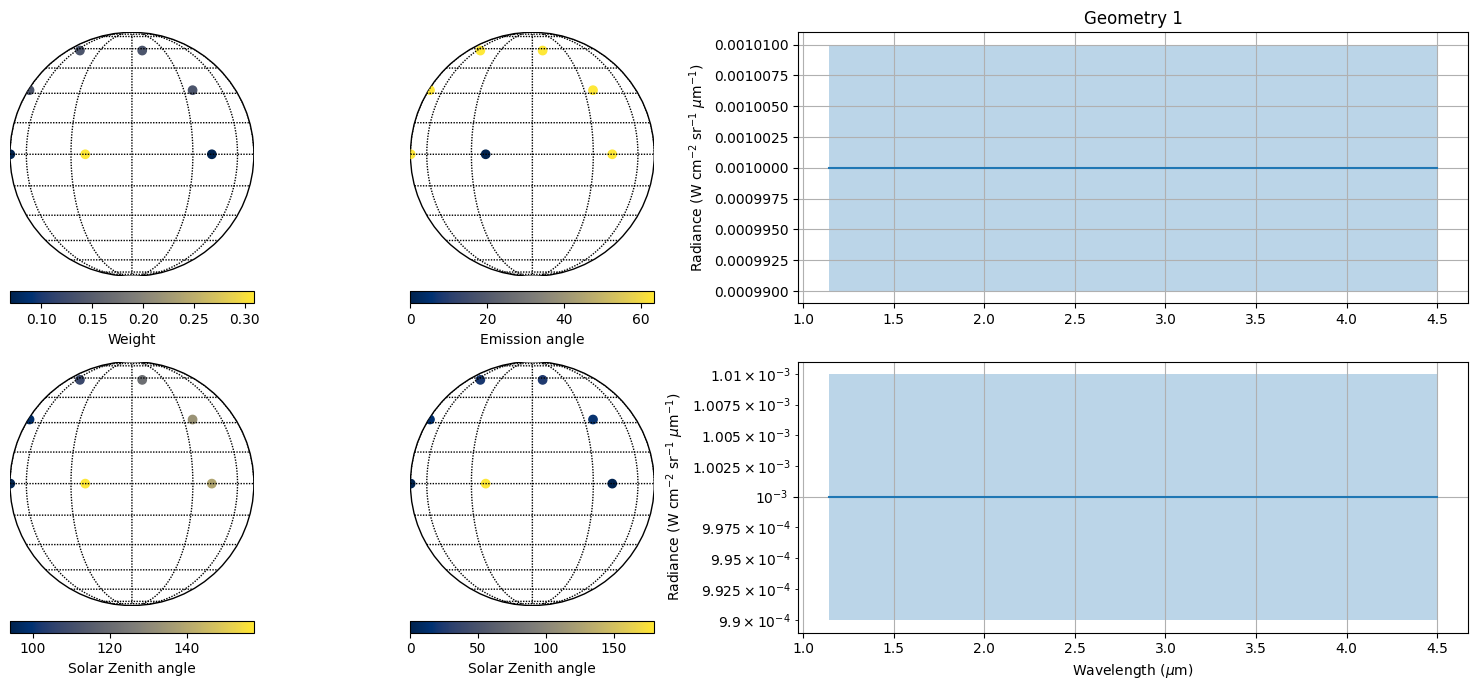

In [3]:
#Initialising the Measurement class
Measurement = Measurement_0(runname='exoplanet_disc_average')

#Reading the .spx file with the observations
Measurement.read_spx()

#Showing a summary of the observations
Measurement.summary_info()

#Making a summary plot of the observation defining the sub-observer location on planet
Measurement.plot_disc_averaging(subobs_lat=0.,subobs_lon=0.)

#### Exoplanet phase curves

Phase curves are a specific type of observations in which a planet is observed as it moves around the parent star in a temporal series of measurements. In practice, phase curves can be modelled as a concatenation of disc-averaging observations. This is, we will have several geometries (*NGEOM* > 1), each one requiring several averaging points (*NAV(IGEOM)* > 1) to accurately represent the field-of-view of the instrument. For each of these geometries, we will need to represent the location and observing angles of each of the points in which a spectrum needs to be modelled. Here, we show an example of a *.spx* file representative of the measurement of an exoplanet phase curve.

### Limb-viewing observations

### Solar/Stellar occultations

Solar occultations are similar to limb-viewing observations, in the sense that the both point towards the limb of the planet. However, instead of observing the scattered light or thermal emission from the atmosphere, the source of light in solar occultations is the Sun. Typically, solar occultations include several geometries made over the same tangent point, but at different tangent altitudes, as shown in the figure below. Therefore, in these observations we will have (*NGEOM* > 1), but only requiring one averaging point for each of the geometries. Here, we show one example of a *.spx* file relevant for a solar occultation observation.

<img src="SolarOccultation_Sketch.png" alt="Drawing" style="width: 500px;"/>

Instrument line shape defined in .fil file
Field-of-view centered at ::  Latitude 81.7 - Longitude 136.58501
There are  29 geometries in the measurement vector

GEOMETRY 1
Minimum wavelength/wavenumber ::  3741.047  - Maximum wavelength/wavenumber ::  3752.983
Limb-viewing or solar occultation measurement. Latitude ::  81.7  - Longitude ::  136.585  - Tangent height ::  11.375

GEOMETRY 2
Minimum wavelength/wavenumber ::  3741.047  - Maximum wavelength/wavenumber ::  3752.983
Limb-viewing or solar occultation measurement. Latitude ::  81.7  - Longitude ::  136.585  - Tangent height ::  14.41

GEOMETRY 3
Minimum wavelength/wavenumber ::  3741.047  - Maximum wavelength/wavenumber ::  3752.983
Limb-viewing or solar occultation measurement. Latitude ::  81.7  - Longitude ::  136.585  - Tangent height ::  17.445

GEOMETRY 4
Minimum wavelength/wavenumber ::  3741.047  - Maximum wavelength/wavenumber ::  3752.983
Limb-viewing or solar occultation measurement. Latitude ::  81.7  - Longitude ::

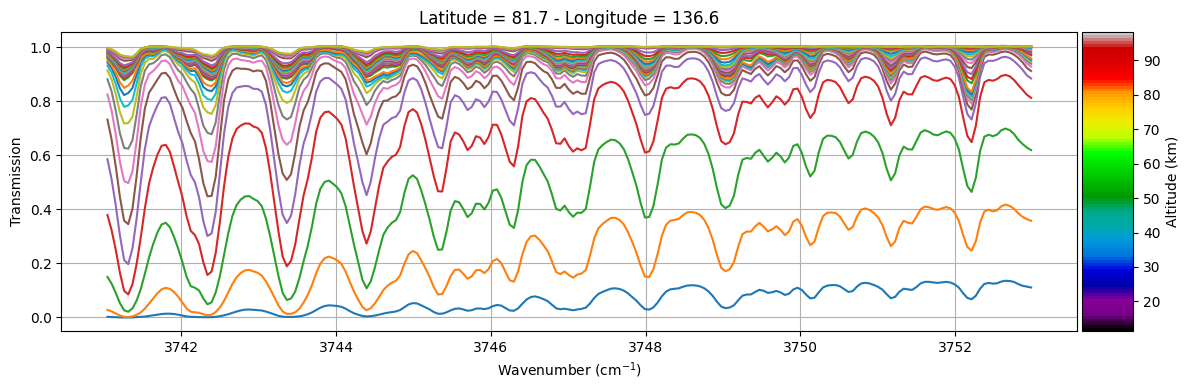

In [4]:
#Initialising the Measurement class
Measurement = Measurement_0(runname='mars_solar_occultation')

#Reading the .spx file with the observations (specific for solar occultations)
Measurement.read_spx_SO()

#Showing a summary of the observations
Measurement.summary_info()

#Making a summary plot of the observation defining the sub-observer location on planet
Measurement.plot_SO()

### Upward-looking observations